# COVID Global Clustering Scratchpad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


## Clustering thoughts
- Take case + death counts
- Trending pattern (?  what is a good single value metric.. rolling 3 day or some momentum value?)
- Adding population data
- Population density ?
- Median age and age distributions

Attempt to cluster the countries ?


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False).transpose()
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail(3))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False).transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail(3))


/var/folders/cq/zlmqp7bs32v5c3rn97dsffp40000gp/T/ipykernel_78081/3159655799.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfc_g.index = pd.to_datetime(dfc_g.index)


'cases'

Country/Region         US     India    France   Germany    Brazil     Japan   
2023-03-07      103690910  44689919  39854299  38231610  37076053  33298799  \
2023-03-08      103755771  44690298  39860410  38241231  37076053  33310604   
2023-03-09      103802702  44690738  39866718  38249060  37076053  33320438   

Country/Region  Korea, South     Italy  United Kingdom    Russia  ...  Nauru   
2023-03-07          30594297  25603510        24629846  22051220  ...   5247  \
2023-03-08          30605187  25603510        24629922  22063473  ...   5247   
2023-03-09          30615522  25603510        24658705  22075858  ...   5247   

Country/Region  Kiribati  Tuvalu  Summer Olympics 2020  Diamond Princess   
2023-03-07          5013    2805                   865               712  \
2023-03-08          5014    2805                   865               712   
2023-03-09          5014    2805                   865               712   

Country/Region  Winter Olympics 2022  Holy See  Antarctica  MS Zaandam   
2023-03-07                       535        29          11           9  \
2023-03-08                       535        29          11           9   
2023-03-09                       535        29          11           9   

Country/Region  Korea, North  
2023-03-07                 1  
2023-03-08                 1  
2023-03-09                 1  

[3 rows x 201 columns]

/var/folders/cq/zlmqp7bs32v5c3rn97dsffp40000gp/T/ipykernel_78081/3159655799.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfd_g.index = pd.to_datetime(dfd_g.index)


'deaths'

Country/Region       US  Brazil   India  Russia  Mexico  United Kingdom   
2023-03-07      1122516  699276  530775  388396  333136          220721  \
2023-03-08      1123246  699276  530776  388440  333170          220721   
2023-03-09      1123836  699276  530779  388478  333188          220721   

Country/Region    Peru   Italy  Germany  France  ...  Tonga  Palau   
2023-03-07      219513  188322   168709  166138  ...     13      9  \
2023-03-08      219539  188322   168808  166165  ...     13      9   
2023-03-09      219539  188322   168935  166176  ...     13      9   

Country/Region  Korea, North  MS Zaandam  Nauru  Summer Olympics 2020   
2023-03-07                 6           2      1                     0  \
2023-03-08                 6           2      1                     0   
2023-03-09                 6           2      1                     0   

Country/Region  Winter Olympics 2022  Antarctica  Tuvalu  Holy See  
2023-03-07                         0           0       0         0  
2023-03-08                         0           0       0         0  
2023-03-09                         0           0       0         0  

[3 rows x 201 columns]

## Add Trailing Avg Changes 3-day 7-day 14day

In [10]:
df_rolls = dfc_g.diff().rolling(3).mean().transpose().iloc[:,-1:]
df_rolls = df_rolls.rename(columns={df_rolls.columns[0]:'Cases3dayAvg'})
df_rolls['Cases7dayAvg'] = dfc_g.diff().rolling(7).mean().transpose().iloc[:,-1:]
df_rolls['Cases14dayAvg'] = dfc_g.diff().rolling(14).mean().transpose().iloc[:,-1:]
df_rolls['Deaths3dayAvg'] = dfd_g.diff().rolling(3).mean().transpose().iloc[:,-1:]
df_rolls['Deaths7dayAvg'] = dfd_g.diff().rolling(7).mean().transpose().iloc[:,-1:]
df_rolls['Deaths14dayAvg'] = dfd_g.diff().rolling(14).mean().transpose().iloc[:,-1:]
df_rolls = df_rolls.rename(index={'US':'United States'})
df_rolls.head()


Cases3dayAvg  Cases7dayAvg  Cases14dayAvg  Deaths3dayAvg   
Country/Region                                                             
United States   49054.333333  30420.714286   31227.928571     551.666667  \
India             381.666667    335.714286     278.285714       1.333333   
France           6494.000000   4403.142857    4052.642857      20.666667   
Germany         12736.333333   6641.285714   11355.071429     179.333333   
Brazil              0.000000   1798.428571    4793.500000       0.000000   

                Deaths7dayAvg  Deaths14dayAvg  
Country/Region                                 
United States      311.142857      308.214286  
India                1.000000        1.071429  
France              18.000000       20.500000  
Germany             91.285714       86.571429  
Brazil              11.285714       31.571429

## Add Global Population by Country

In [11]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016.loc[df_gpop_2016['Country Code'] == 'RUS','Country Name'] = 'Russia'
df_gpop_2016.loc[df_gpop_2016['Country Code'] == 'IRN','Country Name'] = 'Iran'
df_gpop_2016.loc[df_gpop_2016['Country Code'] == 'COD','Country Name'] = 'Congo'
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})
display(df_gpop_2016[df_gpop_2016['Country/Region'].isin(['Italy','Russian Federation','Russia'])])

df_gmerged = pd.merge(left=dfc_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gpop_2016, on='Country/Region').rename(columns={'Value':'Population'})
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Cases" })

df_gmerged = pd.merge(left=dfd_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gmerged, on='Country/Region')
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Deaths" })

# merge rolling averages
df_gmerged = pd.merge(left=df_gmerged, right=df_rolls, on='Country/Region')

display(df_gmerged.sort_values(by=['Population'], ascending=False).head(10))  
display(dfc_g.iloc[0:1,:].count(axis=1), df_gmerged['Country/Region'].count())  # join check 185 in -> 159 out ?


Country/Region Country Code  Year      Value
7186           Italy          ITA  2016   60627498
12488         Russia          RUS  2016  144342397

Country/Region   Deaths      Cases Country Code  Year  Population   
18          China   101056    4903524          CHN  2016  1387790000  \
2           India   530779   44690738          IND  2016  1338636340   
0   United States  1123836  103802702          USA  2016   323071755   
10      Indonesia   160941    6738225          IDN  2016   261850182   
33       Pakistan    30644    1577411          PAK  2016   213524840   
1          Brazil   699276   37076053          BRA  2016   206859578   
93        Nigeria     3155     266598          NGA  2016   188666931   
34     Bangladesh    29445    2037871          BGD  2016   159784568   
3          Russia   388478   22075858          RUS  2016   144342397   
19          Japan    72997   33320438          JPN  2016   127076000   

    Cases3dayAvg  Cases7dayAvg  Cases14dayAvg  Deaths3dayAvg  Deaths7dayAvg   
18      0.000000      0.000000       0.071429       0.333333       0.714286  \
2     381.666667    335.714286     278.285714       1.333333       1.000000   
0   49054.333333  30420.714286   31227.928571     551.666667     311.142857   
10    307.333333    235.571429     228.000000       3.000000       3.000000   
33     56.000000     48.428571      44.000000       0.333333       0.142857   
1       0.000000   1798.428571    4793.500000       0.000000      11.285714   
93      0.000000      0.000000       9.642857       0.000000       0.000000   
34     14.000000      6.000000       7.000000       0.000000       0.000000   
3   11661.000000  12535.428571   12031.571429      41.000000      39.571429   
19  11268.333333   9678.857143   10506.214286      61.333333      59.428571   

    Deaths14dayAvg  
18        1.428571  
2         1.071429  
0       308.214286  
10        3.142857  
33        0.214286  
1        31.571429  
93        0.000000  
34        0.000000  
3        36.357143  
19       67.000000

2020-01-22    201
dtype: int64

174

## Add Various Other Data from WorldBank.Org

In [12]:
# all available indicators https://data.worldbank.org/indicator
#    API docs https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures
#    I should bundle into a single request XLS or Json results, but alas.. this works for now
from zipfile import ZipFile
import requests, zipfile, io
import urllib.request

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def get_zip(url):
    urllib.request.urlretrieve(url, "X.zip")
    compressed_file = zipfile.ZipFile('X.zip')
    files = compressed_file.namelist()
    for f in files:
        if (f.find('API') == 0):
            csv_file = compressed_file.open(f)  # pattern match how?
            return pd.read_csv(csv_file, header=2)
    return None

def add_metric(indicator, colname, dfm, year='2019', debug=True):
    dfnew = get_zip('http://api.worldbank.org/v2/en/indicator/'+indicator+'?downloadformat=csv')
    dfnew = dfnew.fillna(method='ffill', axis=1)[['Country Code', year]].rename(columns={year:colname})

    dfm = pd.merge(left=dfm , right=dfnew, on ='Country Code') 
    display(dfm[dfm['Country/Region'].isin(['Dominica','Japan'])].head()) if debug else None

    dfm[colname] = dfm[colname].astype(str).apply(lambda x: float(x) if isfloat(x) else 0.0).round(2)
    return dfm


## Add demographics from worldbank

In [13]:
#   Examples:
# unemployment data http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# hospital beds http://api.worldbank.org/v2/en/indicator/SH.MED.BEDS.ZS?downloadformat=csv
# air flights http://api.worldbank.org/v2/en/indicator/IS.AIR.DPRT?downloadformat=csv
# rail lines http://api.worldbank.org/v2/en/indicator/IS.RRS.TOTL.KM?downloadformat=csv
# employment F http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.FE.ZS?downloadformat=csv
# employment M http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.MA.ZS?downloadformat=csv
# unemployment http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# urban pop% http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL.IN.ZS?downloadformat=csv
# pollution EN.ATM.PM25.MC.M3
# slum% indicator/ EN.POP.SLUM.UR.ZS

df_gmerged3 = df_gmerged.copy()  # df_gmerged2 no longer needed

df_gmerged3 = add_metric('IS.AIR.DPRT', 'flights', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.ATM.PM25.MC.M3', 'pollution', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SL.UEM.TOTL.ZS', 'unemp%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.MED.BEDS.ZS', 'hospbeds', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('IS.RRS.TOTL.KM', 'railways', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.URB.TOTL.IN.ZS', 'urbanpop%', df_gmerged3, year='2019', debug=False)
#df_gmerged3 = add_metric('EN.POP.SLUM.UR.ZS', 'slum%', df_gmerged3, year='2019', debug=False) # 0 data for g10's
df_gmerged3 = add_metric('EN.POP.DNST', 'popdensity%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('NY.GDP.PCAP.PP.CD', 'GDP/cap', df_gmerged3, year='2019', debug=False)
#df_gmerged3 = add_metric('SE.ADT.LITR.ZS', 'literacy', df_gmerged3, year='2019', debug=False) # 0 data for g10's
#df_gmerged3 = add_metric('FR.INR.DPST', 'deposit rate', df_gmerged3, year='2019', debug=False) # 0 data for g10's
df_gmerged3 = add_metric('IS.SHP.GOOD.TU', 'shipping', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.DYN.LE00.IN', 'lifeExpYrs', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('FP.CPI.TOTL.ZG', 'inflation', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.DYN.TFRT.IN', 'fertility', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.DTH.COMM.ZS', 'COD disease', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.IMM.IDPT', 'DTP immunized', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.POP.65UP.TO.ZS', 'pop% >= 65', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('TG.VAL.TOTL.GD.ZS', 'trade%', df_gmerged3, year='2019', debug=False)

df_gmerged3 = df_gmerged3.sort_values(by='Cases', ascending=False).drop(columns=['Year'])
df_gmerged3.head()

Country/Region   Deaths      Cases Country Code  Population  Cases3dayAvg   
0  United States  1123836  103802702          USA   323071755  49054.333333  \
2          India   530779   44690738          IND  1338636340    381.666667   
9         France   166176   39866718          FRA    66724104   6494.000000   
8        Germany   168935   38249060          DEU    82348669  12736.333333   
1         Brazil   699276   37076053          BRA   206859578      0.000000   

   Cases7dayAvg  Cases14dayAvg  Deaths3dayAvg  Deaths7dayAvg  ...   
0  30420.714286   31227.928571     551.666667     311.142857  ...  \
2    335.714286     278.285714       1.333333       1.000000  ...   
9   4403.142857    4052.642857      20.666667      18.000000  ...   
8   6641.285714   11355.071429     179.333333      91.285714  ...   
1   1798.428571    4793.500000       0.000000      11.285714  ...   

   popdensity%   GDP/cap    shipping  lifeExpYrs  inflation  fertility   
0        35.89  65094.80  54260121.0       78.79       1.81       1.71  \
2       465.19   6887.54  17487621.0       70.91       3.73       2.11   
9       123.07  50500.96   4992918.0       82.83       1.11       1.86   
8       237.82  57399.01  15029605.0       81.29       1.45       1.54   
1        25.34  15304.91  10704669.0       75.34       3.73       1.70   

   COD disease  DTP immunized  pop% >= 65  trade%  
0         5.30           94.0       15.79   19.69  
2        24.17           91.0        6.47   28.62  
9         6.37           96.0       20.68   44.91  
8         4.76           91.0       21.73   70.04  
1        13.71           70.0        9.00   22.12  

[5 rows x 27 columns]

In [14]:
df_gmerged3.head(10).transpose()

0           2            9             8    
Country/Region  United States       India       France       Germany  \
Deaths                1123836      530779       166176        168935   
Cases               103802702    44690738     39866718      38249060   
Country Code              USA         IND          FRA           DEU   
Population          323071755  1338636340     66724104      82348669   
Cases3dayAvg     49054.333333  381.666667       6494.0  12736.333333   
Cases7dayAvg     30420.714286  335.714286  4403.142857   6641.285714   
Cases14dayAvg    31227.928571  278.285714  4052.642857  11355.071429   
Deaths3dayAvg      551.666667    1.333333    20.666667    179.333333   
Deaths7dayAvg      311.142857         1.0         18.0     91.285714   
Deaths14dayAvg     308.214286    1.071429         20.5     86.571429   
flights            10099031.0   1209803.0     598374.0     896647.18   
pollution                7.41       90.87        11.81         12.03   
unemp%                   3.67        6.51         8.41          3.14   
hospbeds                 2.87        0.53         5.91           8.0   
railways            149488.65    67414.07      28157.0       33423.0   
urbanpop%               82.46       34.47        80.71         77.38   
popdensity%             35.89      465.19       123.07        237.82   
GDP/cap               65094.8     6887.54     50500.96      57399.01   
shipping           54260121.0  17487621.0    4992918.0    15029605.0   
lifeExpYrs              78.79       70.91        82.83         81.29   
inflation                1.81        3.73         1.11          1.45   
fertility                1.71        2.11         1.86          1.54   
COD disease               5.3       24.17         6.37          4.76   
DTP immunized            94.0        91.0         96.0          91.0   
pop% >= 65              15.79        6.47        20.68         21.73   
trade%                  19.69       28.62        44.91         70.04   

                         1             19           7               5    
Country/Region       Brazil         Japan        Italy  United Kingdom  \
Deaths               699276         72997       188322          220721   
Cases              37076053      33320438     25603510        24658705   
Country Code            BRA           JPN          ITA             GBR   
Population        206859578     127076000     60627498        65611593   
Cases3dayAvg            0.0  11268.333333          0.0     9621.666667   
Cases7dayAvg    1798.428571   9678.857143  3808.285714          4125.0   
Cases14dayAvg        4793.5  10506.214286  4006.857143          3952.5   
Deaths3dayAvg           0.0     61.333333          0.0             0.0   
Deaths7dayAvg     11.285714     59.428571    32.571429             0.0   
Deaths14dayAvg    31.571429          67.0    33.714286             0.0   
flights            814301.0     1018436.0     260599.0       1061464.0   
pollution             12.71          11.7        16.75           10.47   
unemp%                12.05          2.35         9.95            3.74   
hospbeds               2.09         12.98         3.14            2.46   
railways            32622.0       20087.4      16778.6         16295.0   
urbanpop%             86.82          91.7        70.74           83.65   
popdensity%           25.34        347.42       201.98          276.26   
GDP/cap            15304.91      42314.94      45799.4         49661.6   
shipping         10704669.0    23276482.0   10789337.0      10508000.0   
lifeExpYrs            75.34         84.36         83.5            81.4   
inflation              3.73          0.47         0.61            1.74   
fertility               1.7          1.36         1.27            1.63   
COD disease           13.71          10.3          5.5            8.16   
DTP immunized          70.0          98.0         96.0            93.0   
pop% >= 65              9.0         29.28        23.06           18.53   
trade%      

# Correlation Matrix

In [15]:
import seaborn as sns

df_corr = df_gmerged3.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr.iloc[0:2,:], mask=np.zeros_like(df_corr.iloc[0:2,:], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df_corr


ValueError: could not convert string to float: 'United States'

## Scaling / Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
scaler = StandardScaler()

df_orig = df_gmerged3.copy().set_index('Country/Region').drop(columns=['Country Code'])
df_sc = pd.DataFrame(scaler.fit_transform(df_orig), index=df_orig.index, columns=df_orig.columns)

display('original',df_orig.head(2),'scaled',df_sc.head(2))

'original'

Deaths   Cases  Population  Cases3dayAvg  Cases7dayAvg  \
Country/Region                                                           
United States    46622  840351   322941311  27180.666667  29143.000000   
Spain            21717  208389    46484062   3238.333333   4392.142857   

                Cases14dayAvg  Deaths3dayAvg  Deaths7dayAvg  Deaths14dayAvg  \
Country/Region                                                                
United States    29406.928571    1987.000000    2612.000000     2279.857143   
Spain             4297.785714     421.333333     429.857143      494.642857   

                  flights  ...  popdensity%   GDP/cap    shipping  lifeExpYrs  \
Country/Region             ...                                                  
United States   9879630.0  ...        35.77  62794.59  54688353.0       78.54   
Spain            641020.0  ...        93.53  39715.44  17189759.0       83.33   

                inflation  fertility  COD disease  DTP immunized  pop% >= 65  \
Country/Region                                                                 
United States        1.81       1.73          5.2           94.0       15.81   
Spain                0.70       1.31          5.1           93.0       19.38   

                trade%  
Country/Region          
United States    20.83  
Spain            51.67  

[2 rows x 25 columns]

'scaled'

Deaths      Cases  Population  Cases3dayAvg  Cases7dayAvg  \
Country/Region                                                                
United States   9.105261  11.359867    1.812369     11.889151     11.838544   
Spain           4.120294   2.649731    0.021412      1.236534      1.608220   

                Cases14dayAvg  Deaths3dayAvg  Deaths7dayAvg  Deaths14dayAvg  \
Country/Region                                                                
United States       11.794023      10.944075      11.427110       10.844698   
Spain                1.547690       2.156247       1.719946        2.194035   

                  flights  ...  popdensity%   GDP/cap  shipping  lifeExpYrs  \
Country/Region             ...                                                
United States   10.921371  ...    -0.182220  1.823748  2.675697    0.603148   
Spain            0.469807  ...    -0.146901  0.803474  0.677905    1.034158   

                inflation  fertility  COD disease  DTP immunized  pop% >= 65  \
Country/Region                                                                 
United States   -0.187901  -0.684111    -0.766188       0.399819    1.074270   
Spain           -0.260393  -1.009471    -0.770998       0.343845    1.616266   

                  trade%  
Country/Region            
United States  -1.116918  
Spain          -0.258443  

[2 rows x 25 columns]

# Misc Clustering Techniques

## - Basic Template for KMeans

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

df_train = df_sc.copy()

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_train) # train on sample rows

display(f'kmeans info - inertia: {kmeans.inertia_}, iters: {kmeans.n_iter_}')    # training info 
display(f'labels: {kmeans.labels_}')                       # k-labels

def fl_col(df, f=3, l=9):  # print first 3 and last 2 cols together
    return pd.concat([df.iloc[:,0:f],df.iloc[:,-l:]], axis=1)
    
df_train.insert(0, 'cluster', kmeans.labels_)
display('train', fl_col(pd.concat([df_train.head(5),
                            df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])]])))
display(df_train[['cluster','Cases']].groupby(by=['cluster']).count())


'kmeans info - inertia: 2224.029938973404, iters: 8'

'labels: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0\n 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2\n 2 2 0 2 2 0 2 0 0 2 2 0 0 2 0 0 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 2 2 2 0 0 0\n 0 2 2 2 2 2 2 0 2 0 2 0 2 2 0 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 0 0\n 2 0 0 2 2 0 0 0 2 2 0 2 2]'

'train'

cluster    Deaths      Cases   GDP/cap   shipping  lifeExpYrs  \
Country/Region                                                                  
United States         1  9.105261  11.359867  1.823748   2.675697    0.603148   
Spain                 0  4.120294   2.649731  0.803474   0.677905    1.034158   
Italy                 0  4.794431   2.359440  0.896973   0.324008    0.999965   
France                0  4.051439   1.943175  1.052229   0.101424    0.962173   
Germany               0  0.830076   1.853905  1.394048   0.806188    0.823602   
United States         1  9.105261  11.359867  1.823748   2.675697    0.603148   
Spain                 0  4.120294   2.649731  0.803474   0.677905    1.034158   
Italy                 0  4.794431   2.359440  0.896973   0.324008    0.999965   
China                 0  0.701373   0.933497 -0.146054  11.793459    0.437583   
India                 2 -0.090257   0.072106 -0.609072   0.634902   -0.217481   
Japan                 0 -0.170321  -0.063763  0.939723   0.957290    1.113341   
Poland                0 -0.141298  -0.082274  0.433066  -0.086898    0.532063   

                inflation  fertility  COD disease  DTP immunized  pop% >= 65  \
Country/Region                                                                 
United States   -0.187901  -0.684111    -0.766188       0.399819    1.074270   
Spain           -0.260393  -1.009471    -0.770998       0.343845    1.616266   
Italy           -0.266271  -1.001724    -0.780618       0.455794    2.127899   
France          -0.233616  -0.552418    -0.727709       0.511769    1.714949   
Germany         -0.211412  -0.815805    -0.785428       0.343845    1.932051   
United States   -0.187901  -0.684111    -0.766188       0.399819    1.074270   
Spain           -0.260393  -1.009471    -0.770998       0.343845    1.616266   
Italy           -0.266271  -1.001724    -0.780618       0.455794    2.127899   
China           -0.116715  -0.715098    -0.833528       0.679693    0.331872   
India            0.194152  -0.304525     0.234284       0.119946   -0.387753   
Japan           -0.274761  -0.924258    -0.405441       0.679693    2.861187   
Poland          -0.160471  -0.877778    -0.775808       0.455794    1.333882   

                  trade%  
Country/Region            
United States  -1.116918  
Spain          -0.258443  
Italy          -0.297692  
France         -0.439658  
Germany         0.310533  
United States  -1.116918  
Spain          -0.258443  
Italy          -0.297692  
China          -0.751147  
India          -0.840502  
Japan          -0.864163  
Poland          0.808527

Cases
cluster       
0          103
1            1
2           57

## - Basic Template for DBSCAN

I saw a presentation by Healy & McInnes on Youtube that basically said KMeans sucks, and we should use DBScan or their upgraded version HDBScan.   https://www.youtube.com/watch?v=ayZQj4llUSU&t=1824s


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

df_train = df_sc.copy()
clustering = DBSCAN(eps=3, min_samples=2).fit(df_train)
components = clustering.components_
labels =clustering.labels_
core_sample_indices = clustering.core_sample_indices_
display(f'model: {clustering}')

display(f'core_sample_indices_[0:10]: {core_sample_indices[0:10]}')
display(f'components_[0]: {components[0]}')    
display(f'labels/fit_predict[0:10]: {labels[0:10]}')                       

df_train.insert(0, 'cluster',clustering.labels_)
display('train2',pd.concat([fl_col(df_train).head(), 
                            fl_col(df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])])]))
display(df_train[['cluster','Cases']].groupby(by=['cluster']).count().rename(columns={'Cases':'Count'}))


"model: DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',\n       metric_params=None, min_samples=2, n_jobs=None, p=None)"

'core_sample_indices_[0:10]: [ 1  2  3  5  6  7 10 11 13 14]'

'components_[0]: [ 4.12029404  2.64973116  0.02141183  1.23653436  1.60822016  1.54769038\n  2.1562467   1.71994558  2.19403547  0.46980672 -0.89882994  1.3720069\n  0.04930401  0.60599096  0.86717548 -0.14690117  0.80347416  0.67790503\n  1.03415791 -0.2603928  -1.00947095 -0.77099844  0.34384456  1.61626635\n -0.25844295]'

'labels/fit_predict[0:10]: [-1  0  0  0 -1  0  1  1 -1 -1]'

'train2'

cluster    Deaths      Cases   GDP/cap   shipping  lifeExpYrs  \
Country/Region                                                                  
United States        -1  9.105261  11.359867  1.823748   2.675697    0.603148   
Spain                 0  4.120294   2.649731  0.803474   0.677905    1.034158   
Italy                 0  4.794431   2.359440  0.896973   0.324008    0.999965   
France                0  4.051439   1.943175  1.052229   0.101424    0.962173   
Germany              -1  0.830076   1.853905  1.394048   0.806188    0.823602   
United States        -1  9.105261  11.359867  1.823748   2.675697    0.603148   
Spain                 0  4.120294   2.649731  0.803474   0.677905    1.034158   
Italy                 0  4.794431   2.359440  0.896973   0.324008    0.999965   
China                -1  0.701373   0.933497 -0.146054  11.793459    0.437583   
India                -1 -0.090257   0.072106 -0.609072   0.634902   -0.217481   
Japan                -1 -0.170321  -0.063763  0.939723   0.957290    1.113341   
Poland                1 -0.141298  -0.082274  0.433066  -0.086898    0.532063   

                inflation  fertility  COD disease  DTP immunized  pop% >= 65  \
Country/Region                                                                 
United States   -0.187901  -0.684111    -0.766188       0.399819    1.074270   
Spain           -0.260393  -1.009471    -0.770998       0.343845    1.616266   
Italy           -0.266271  -1.001724    -0.780618       0.455794    2.127899   
France          -0.233616  -0.552418    -0.727709       0.511769    1.714949   
Germany         -0.211412  -0.815805    -0.785428       0.343845    1.932051   
United States   -0.187901  -0.684111    -0.766188       0.399819    1.074270   
Spain           -0.260393  -1.009471    -0.770998       0.343845    1.616266   
Italy           -0.266271  -1.001724    -0.780618       0.455794    2.127899   
China           -0.116715  -0.715098    -0.833528       0.679693    0.331872   
India            0.194152  -0.304525     0.234284       0.119946   -0.387753   
Japan           -0.274761  -0.924258    -0.405441       0.679693    2.861187   
Poland          -0.160471  -0.877778    -0.775808       0.455794    1.333882   

                  trade%  
Country/Region            
United States  -1.116918  
Spain          -0.258443  
Italy          -0.297692  
France         -0.439658  
Germany         0.310533  
United States  -1.116918  
Spain          -0.258443  
Italy          -0.297692  
China          -0.751147  
India          -0.840502  
Japan          -0.864163  
Poland          0.808527

Count
cluster       
-1          13
 0           4
 1         142
 2           2

---

# Dimension Reduction

## - PCA Method

Most research tells us due to "Curse of Dimensionality" that you need to reduce dims before you run clustering.  Hence we redo.

[Text(0, 0.5, 'PCA3')]

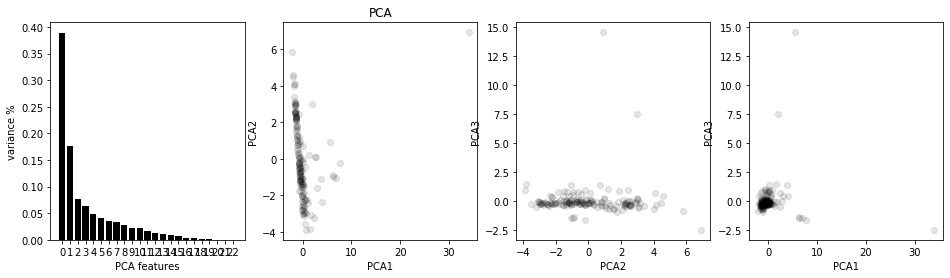

In [ ]:
# method copied from kaggle: https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

plotX = df_sc.copy()

pca = PCA(n_components='mle')
principalComponents = pca.fit_transform(plotX)
PCA_components = pd.DataFrame(principalComponents, index=plotX.index)

# Plot the explained variances
features = range(pca.n_components_)

fig,ax = plt.subplots(1,4, figsize=(16,4))

ax[0].bar(features, pca.explained_variance_ratio_, color='black')
ax[0].set(xlabel = 'PCA features')
ax[0].set(ylabel = 'variance %')
ax[0].set(xticks = features)

ax[1].scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
ax[1].set(xlabel = 'PCA1')
ax[1].set(ylabel = 'PCA2')
ax[1].set(title='PCA')

ax[2].scatter(PCA_components[1], PCA_components[2], alpha=.1, color='black')
ax[2].set(xlabel = 'PCA2')
ax[2].set(ylabel = 'PCA3')

ax[3].scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
ax[3].set(xlabel = 'PCA1')
ax[3].set(ylabel = 'PCA3')



## 

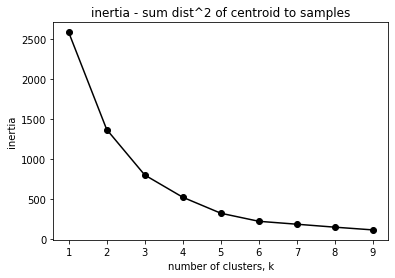

In [ ]:
# KMeans on PCA columns - the elbow check !
def elbow_check(df_km):
    ks = range(1, 10)
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(df_km.iloc[:,:3])
        inertias.append(model.inertia_)

    plt.plot(ks, inertias, '-o', color='black')
    plt.title('inertia - sum dist^2 of centroid to samples')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()
    
elbow_check(PCA_components)

## KMeans Cluster Variants and Plots

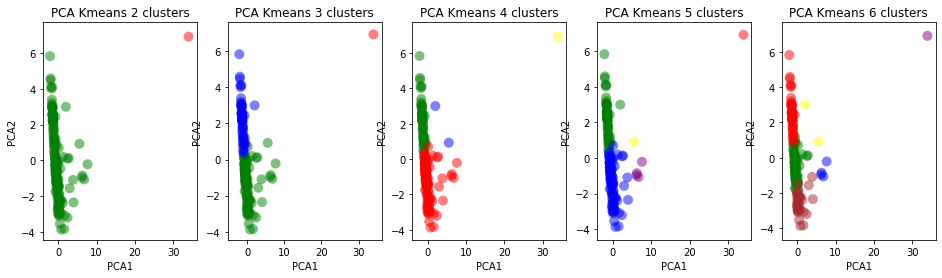

In [ ]:
cluster_cases = [2,3,4,5,6]

def plot_clusters(cluster_name, cluster_cases, df_comp, dims=2):
    fig,ax = plt.subplots(1,len(cluster_cases), figsize=(16,4))

    for c,clusters in enumerate(cluster_cases):
        model = KMeans(n_clusters=clusters)
        df_comp2 = df_comp.copy()
#        m = model.fit(df_comp2.iloc[:,:dims])
        m = model.fit(df_comp2)
        df_comp2.insert(0, 'cluster', m.labels_)

        datas = []
        for i in range(clusters): 
            tup = []
            for j in range(dims):  ## should be cluster dims? pca dims?
                tup.append(df_comp2[df_comp2['cluster']==i][j])
            datas.append(tup)

        groups = [cluster_name+str(i) for i in range(clusters)]
        colors = ('green','red','blue','yellow','purple','brown')

        for data,color,group in zip(datas,colors,groups):
            x,y = data[0],data[1]
            ax[c].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
            ax[c].set_title(f'{cluster_name} Kmeans {clusters} clusters')
            ax[c].set(xlabel=cluster_name+'1')
            ax[c].set(ylabel=cluster_name+'2')
    plt.show()

# hmm which one to pick?
plot_clusters('PCA', cluster_cases, PCA_components)



## KMeans with Point Labels

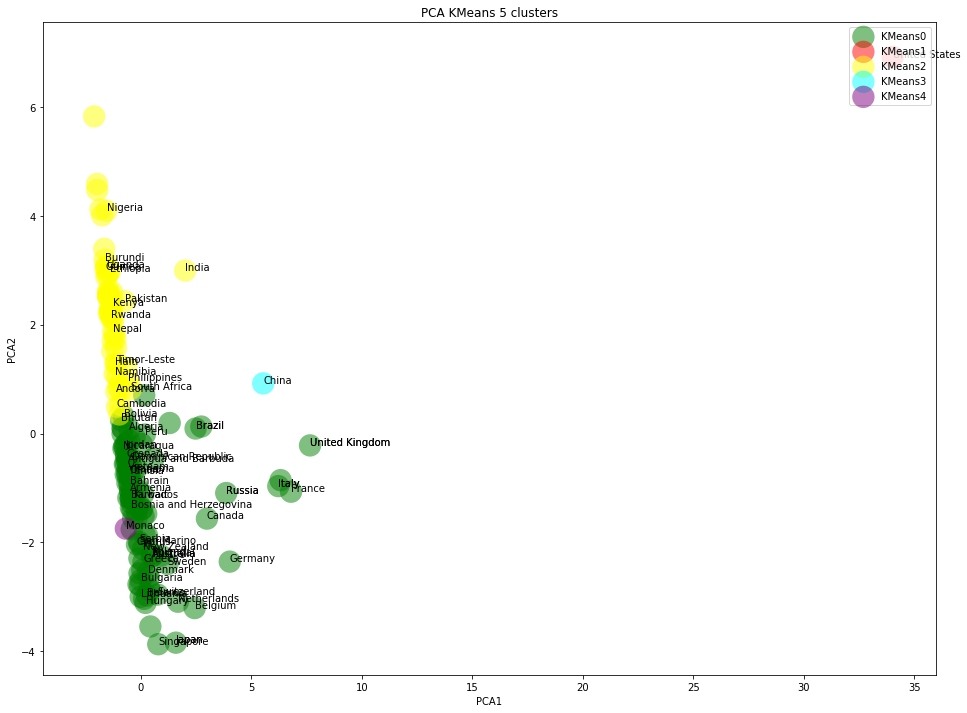

In [ ]:
def plot_big(clustering_name, reducer_name, model, df_comp, dims=2, countries=30):
    df_comp2 = df_comp.copy()
    fig,ax = plt.subplots(figsize=(16,12))

    m = model.fit(df_comp2)  # first 3 cols, or dims
    df_comp2.insert(0, 'cluster', m.labels_)
    
    datas = []
    for i in range(len(set(m.labels_))):
        tup = []
        for j in range(dims):
            tup.append(df_comp2[df_comp2['cluster']==i][j])
        datas.append(tup)

    groups = [clustering_name+str(i) for i in range(len(set(m.labels_)))]
    colors = ('green','red','yellow','cyan','purple','brown')

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
        ax.set_title(f'{reducer_name} {clustering_name} {len(set(m.labels_))} clusters')
        ax.set(xlabel=f'{reducer_name}1')
        ax.set(ylabel=f'{reducer_name}2')

    for index,row in df_comp2[df_comp2.index.isin(['United Kingdom','Belgium','Canada', 'France', 'Germany', 'Italy', 'Netherlands', 'Sweden', 'Switzerland','Canada','Japan','United States','China','Australia','Singapore','South Africa','Belarus','Brazil','Russia','India','Poland'])].iterrows():
        ax.annotate(index, (row[0],row[1]))
    for index,row in df_comp2.sample(countries).iterrows():
        ax.annotate(index, (row[0],row[1]))

    plt.legend(loc=1)
    plt.show()
    
# zoom on n cluster solution
clusters=5
model = KMeans(n_clusters=clusters)
plot_big('KMeans','PCA',model, PCA_components, countries=50)


## -T-SNE Method (T-Distributed Stochastic Neighbor Embedding)

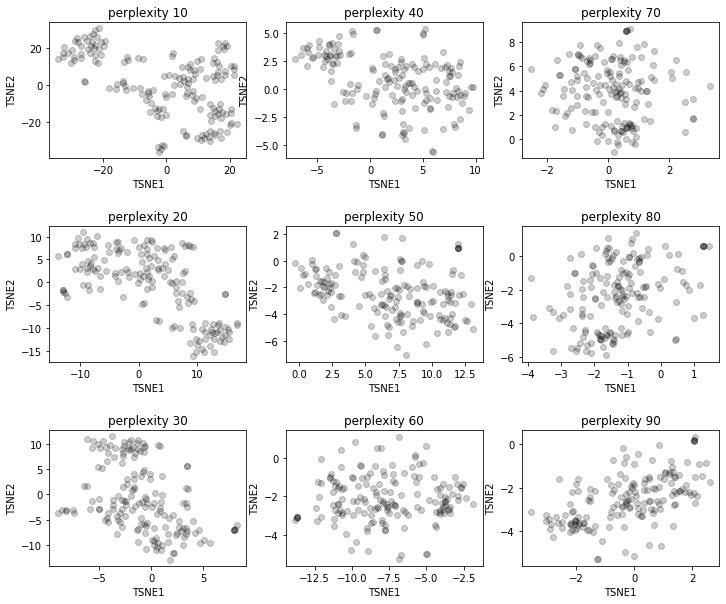

In [ ]:
plotX = df_train.copy()
ps = [10,20,30,40,50,60,70,80,90]

fig,ax = plt.subplots(3, 3, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math 

# the search for ideal perplexity hyperameters...
for i, perplexity in enumerate(ps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsneComponents = tsne.fit_transform(plotX.drop(["cluster"], axis=1))
    TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

    ax[i%3][math.floor(i/3)].set_title(f'perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=.2, color='black')
    ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
    ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')


## Fixing TSNE HyperParams (Perplexity and Comps)

In [ ]:
# pick perp 30 randomly, comps 2 or 3 (plot dimensions I think)
tsne = TSNE(n_components=2, perplexity=30)
tsneComponents = tsne.fit_transform(plotX.drop(["cluster"], axis=1))
TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)
TSNE_components.head()

0          1
Country/Region                     
United States  -6.853132  12.181935
Spain          -7.726995  11.771605
Italy          -7.731576  11.773942
France         -7.685504  11.787235
Germany        -9.634266   8.926648

## KMeans w/ TSNE

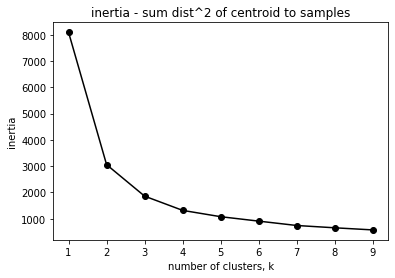

In [ ]:
# KMeans on TSNE columns, search or the elbow ?

elbow_check(TSNE_components)

## KMeans on TSNE Cluster Analysis

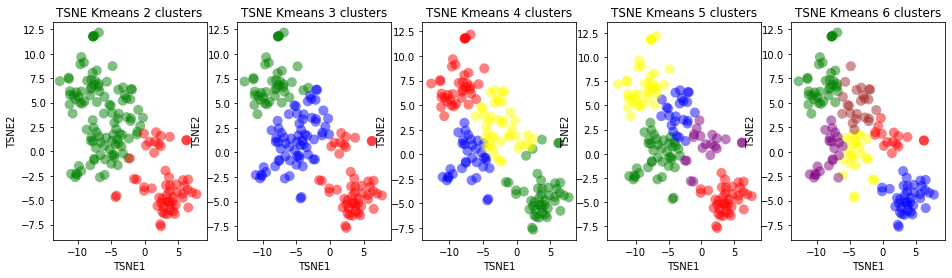

In [ ]:
cluster_cases = [2,3,4,5,6]
plot_clusters('TSNE', cluster_cases, TSNE_components)

# hmm which one to pick?

## KMeans on TSNE - Zoom with Labels

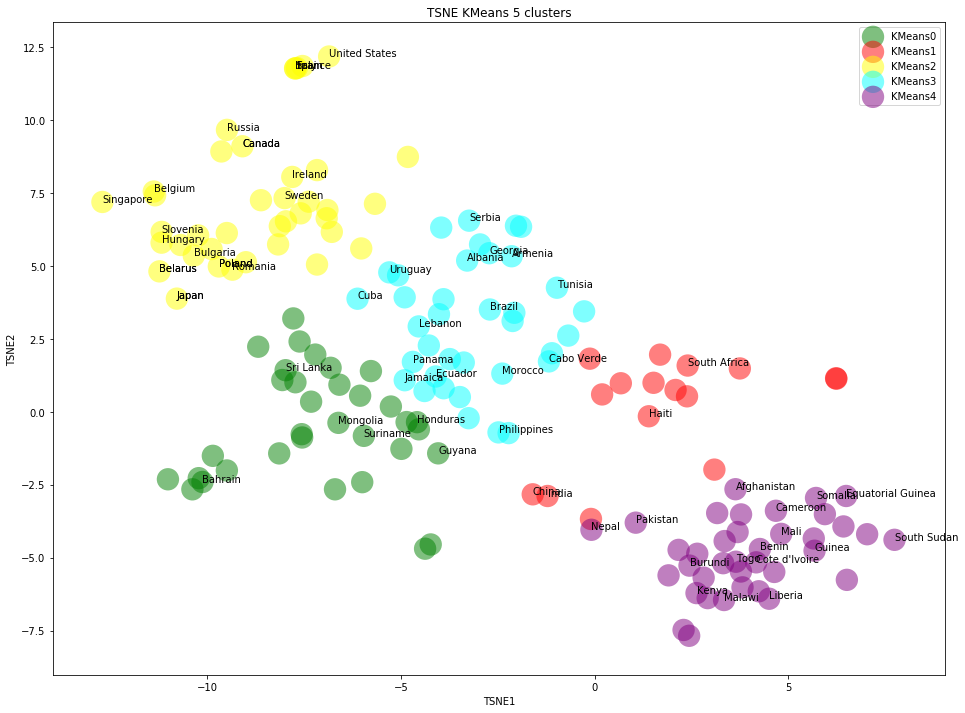

In [ ]:
# try 6 clusters -- why i dunno, looks good... 
model = KMeans(n_clusters=5)            
plot_big('KMeans','TSNE',model, TSNE_components, countries=50)

---
## DBScan on PCA Cluster Analysis


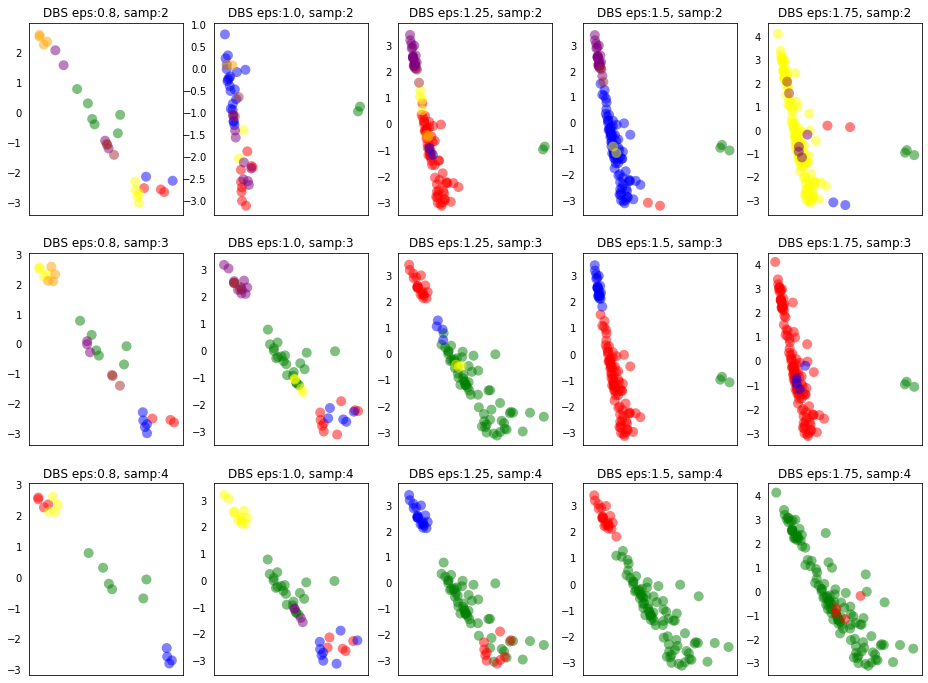

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
from itertools import product

# try a variety of eps & samples 
samp_list = [2,3,4]
eps_list = [0.8, 1.0, 1.25, 1.5, 1.75]
rl = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(16,12))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    PCA_components3 = PCA_components.copy()

    ax[k%rl][math.floor(k/rl)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(PCA_components3)
    PCA_components3.insert(0, 'cluster', clustering.labels_)

    datas = []
    for i in range(len(set(clustering.labels_))): 
#         tup = []
#         for j in range(2):  # 2d hardcoded
#             tup.append(PCA_components3[PCA_components3['cluster']==i][j])
        tup = [PCA_components3[PCA_components3['cluster']==i][j] for j in range(2)]
        datas.append(tup)

    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax[k%rl][math.floor(k/rl)].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rl][math.floor(k/rl)].set_title(f'DBS eps:{eps}, samp:{samp}')


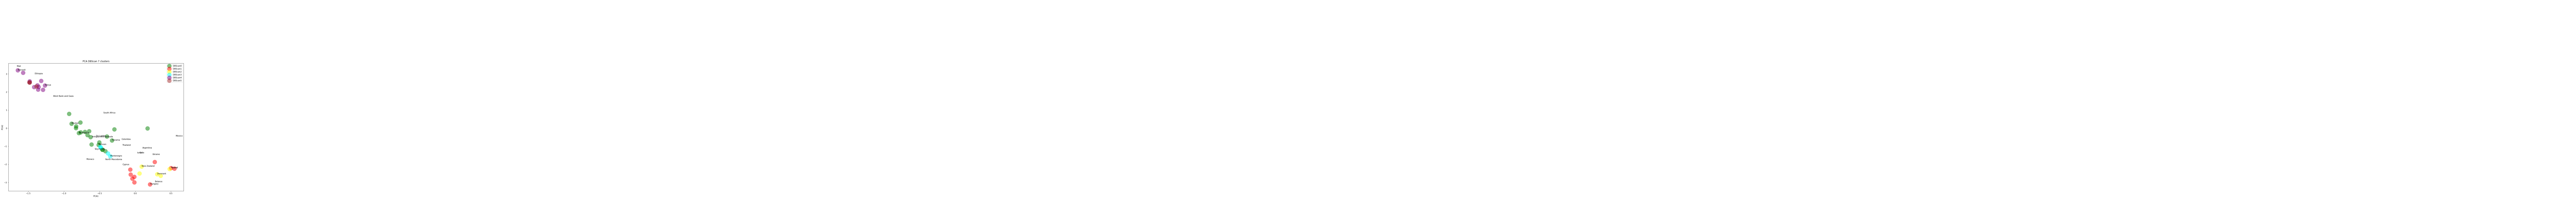

In [ ]:
PCA_components3 = PCA_components.copy()
clustering = DBSCAN(eps=1, min_samples=3).fit(PCA_components3)
plot_big('DBScan','PCA',clustering, PCA_components3) # bug w/ DBAcan use ..'


## DBScan on TSNE Cluster Analysis

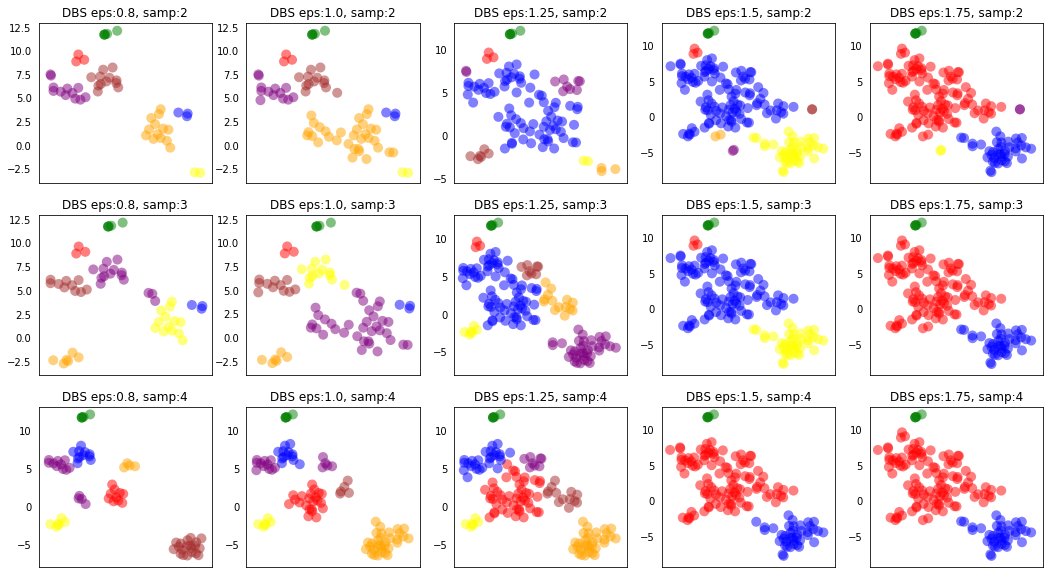

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
from itertools import product
from math import floor  

samp_list = [2,3,4]
eps_list = [0.8, 1.0, 1.25, 1.5, 1.75]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')


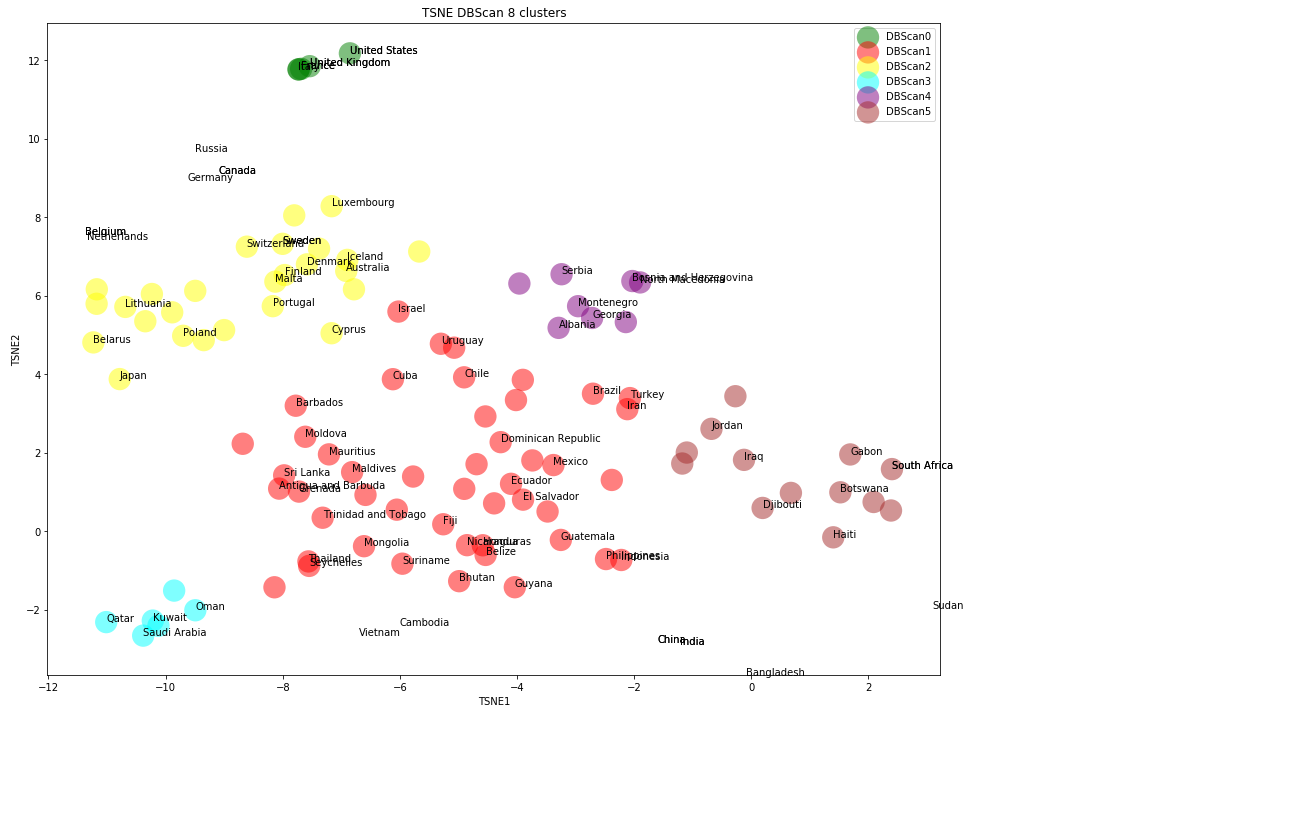

In [ ]:
TSNE_df = TSNE_components.copy()
clustering = DBSCAN(eps=1.25, min_samples=4).fit(TSNE_df)
plot_big('DBScan','TSNE',clustering, TSNE_df, countries=100)

In [ ]:
df_gmerged3.head()

In [ ]:
dfc_g['Russia']
df_gmerged3[df_gmerged3['Country/Region'] == 'Russia']

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = df_gmerged3.copy()

fig = go.Figure(data=go.Choropleth(
    locations = df['Country Code'],
    z = df['Cases'].apply(np.log),
    text = df['Country/Region'],
    colorscale = 'Reds',
#    colorscale = ['rgb(245,245,245)', 'rgb(254,224,210)', 'rgb(252,187,161)', 'rgb(252,146,114)', 'rgb(251,106,74)', 'rgb(239,59,44)', 'rgb(203,24,29)', 'rgb(165,15,21)', 'rgb(103,0,13)'],
    autocolorscale=False,
    colorbar=dict(
            title="Cases",
            titleside="top",
            tickmode="array",
            tickvals=[2, 4 ,7, 9, 11, 13],
            ticktext=["10", "100", "500", "1k",  "50k", "300k+"],
            ticks="outside"
        )))

fig.update_layout(
    title_text='Global COVID Cases',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular' ),
    annotations = [dict(
        x=0.55, y=0.1,
        xref='paper', yref='paper',
        text='Source: <a href="https://github.com/dougfoo/machineLearning/covid"> John Hopkins + WorldBank</a>',
        showarrow = False
    )]
)

fig.show()
